In [2]:
import sys
# Change to repository root, so it can find the config folder with the paths inside it
GITHUB_REPO_PATH = '/Users/maxwellrosen/Storage/Salk_Plant_Imaging/eckerlabproj'
# Add config folder with paths to Python's import search path
if GITHUB_REPO_PATH not in sys.path:
    sys.path.insert(0, GITHUB_REPO_PATH)

import config.paths as paths

# only needed in Jupyter Lab to see the images inline
%matplotlib widget

from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import shutil

In [3]:
image_path = '/Users/maxwellrosen/Library/CloudStorage/GoogleDrive-salkimager@gmail.com/My Drive/Chamber/CLeft_Holder/ChamberLeft_image_2025-12-30--13-00.jpg'
# Change to Chamber folder: this is where the temporary data on pixel number in plants is saved
t1_temp_chamber_image_results = paths.t1_temp_pixel_results
# Change to location where data from this run is saved
analysis_results_csv_path = paths.t1_analysis_results
# Change to location where plant_names.csv is saved
plant_names_path = paths.t1_plant_names

# Input/output options for PlantCV
args = WorkflowInputs(
    images=[image_path],
    names="image",
    result=t1_temp_chamber_image_results, 
    outdir=".",
    writeimg=False,
    debug="plot"
    )

# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

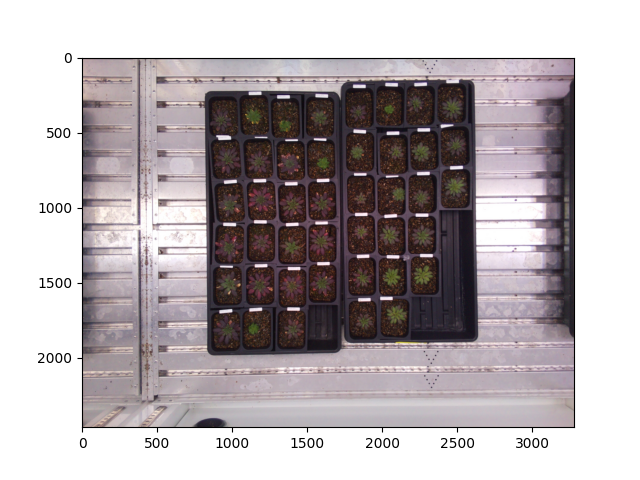

In [4]:
# Shows your image, defines it as "img"
img, path, filename = pcv.readimage(filename=args.image)

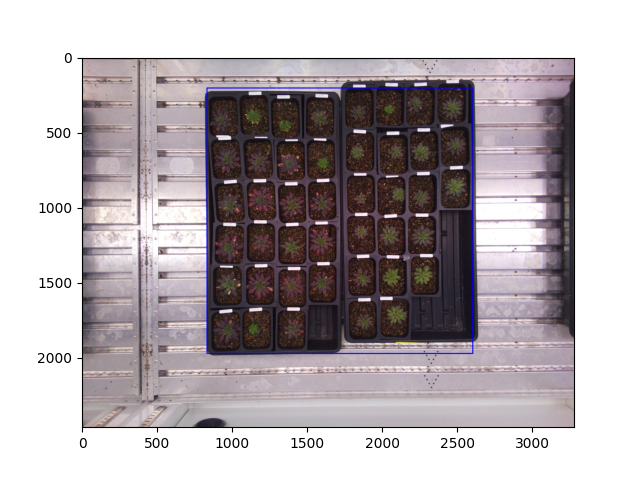

In [5]:
# Crops your image
crop_img = pcv.crop(img=img, x=833, y=206, w=1773, h=1769)

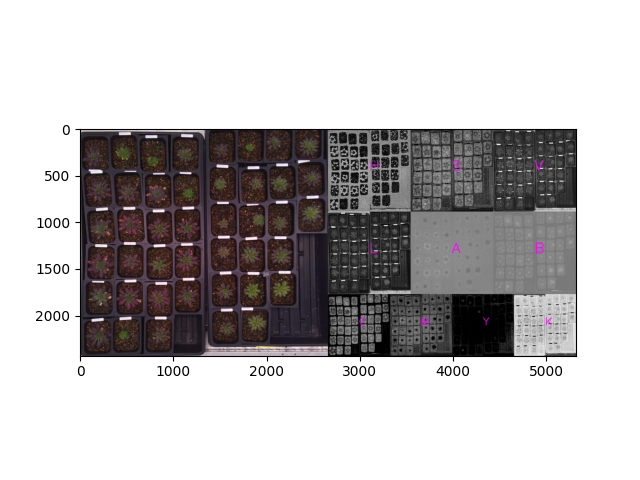

In [8]:
# Shows options for which channel to view the image through (ideally want the most contrast)
colorspace_img = pcv.visualize.colorspaces(rgb_img=crop_img)

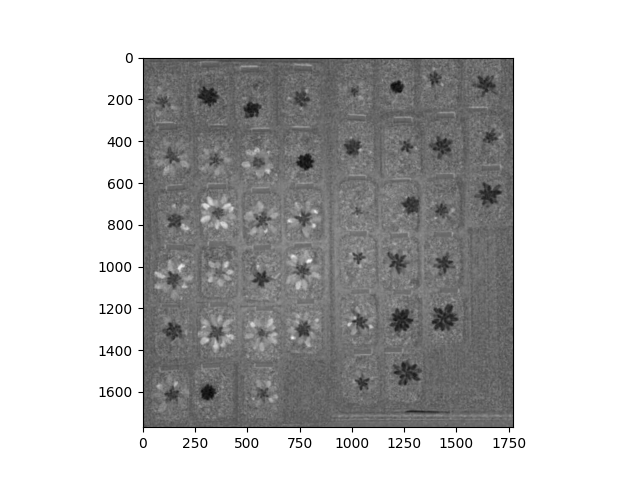

In [27]:
# Actually picks a channel with rgb2gray_"lab" and then the channel is the letter from "lab" that you look through
channeled_img = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

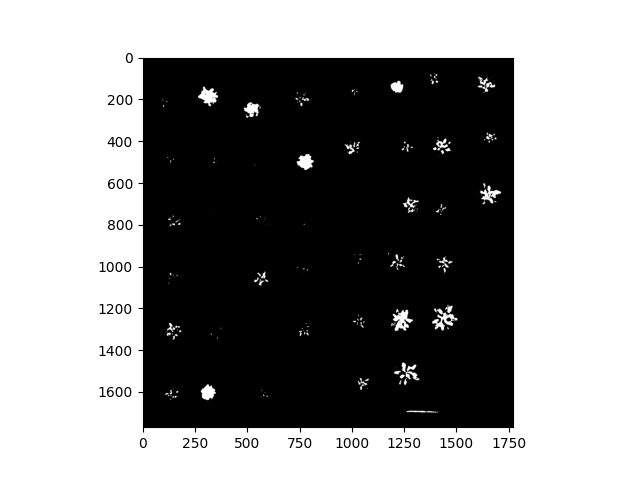

In [29]:
# Masks the image
thresh_mask = pcv.threshold.binary(gray_img=channeled_img, threshold=120, object_type='dark')

In [25]:
plt.close('all')